In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data/retail_data.csv")
# df = pd.DataFrame(data)

In [2]:
data.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [3]:
data.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [5]:
data.shape

(302010, 30)

In [6]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [7]:
data.columns[0]

'Transaction_ID'

In [8]:
# delete 不重要欄位 
# 'Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'Zipcode'
data = data.drop(columns = ['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'Zipcode'])

In [9]:
data.columns

Index(['City', 'State', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [12]:
for i in range(len(data.columns)):
    data_uni_num = data.iloc[:,i].nunique()
    print(data.columns[i] + "獨特數量:" + str(data_uni_num))

City獨特數量:130
State獨特數量:54
Country獨特數量:5
Age獨特數量:53
Gender獨特數量:2
Income獨特數量:3
Customer_Segment獨特數量:3
Date獨特數量:366
Year獨特數量:2
Month獨特數量:12
Time獨特數量:83677
Total_Purchases獨特數量:10
Amount獨特數量:299297
Total_Amount獨特數量:299305
Product_Category獨特數量:5
Product_Brand獨特數量:18
Product_Type獨特數量:33
Feedback獨特數量:4
Shipping_Method獨特數量:3
Payment_Method獨特數量:4
Order_Status獨特數量:4
Ratings獨特數量:5
products獨特數量:318


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   City              301762 non-null  object 
 1   State             301729 non-null  object 
 2   Country           301739 non-null  object 
 3   Age               301837 non-null  float64
 4   Gender            301693 non-null  object 
 5   Income            301720 non-null  object 
 6   Customer_Segment  301795 non-null  object 
 7   Date              301651 non-null  object 
 8   Year              301660 non-null  float64
 9   Month             301737 non-null  object 
 10  Time              301660 non-null  object 
 11  Total_Purchases   301649 non-null  float64
 12  Amount            301653 non-null  float64
 13  Total_Amount      301660 non-null  float64
 14  Product_Category  301727 non-null  object 
 15  Product_Brand     301729 non-null  object 
 16  Product_Type      30

In [14]:
# 觀察時間與地點類型以外的欄位
data[["Age", 
"Gender", 
"Income", 
"Customer_Segment", 
"Total_Purchases", 
"Product_Category", 
"Product_Brand", 
"Product_Type", 
"Feedback", 
"Shipping_Method", 
"Payment_Method",
"Order_Status",
"Ratings",
"products"]].head()

,Age,Gender,Income,Customer_Segment,Total_Purchases,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,21.0,Male,Low,Regular,3.0,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,19.0,Female,Low,Premium,2.0,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,48.0,Male,Low,Regular,3.0,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,56.0,Male,High,Premium,7.0,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,22.0,Male,Low,Premium,2.0,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [15]:
np.sort(data["Age"].unique())

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., nan])

In [16]:
data["Income"].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [17]:
data["Customer_Segment"].unique()

array(['Regular', 'Premium', 'New', nan], dtype=object)

In [18]:
np.sort(data["Total_Purchases"].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [19]:
data["Product_Category"].unique()

array(['Clothing', 'Electronics', 'Books', 'Home Decor', 'Grocery', nan],
      dtype=object)

In [20]:
data["Product_Brand"].unique()

array(['Nike', 'Samsung', 'Penguin Books', 'Home Depot', 'Nestle',
       'Apple', 'Zara', 'Random House', 'Coca-Cola', 'Adidas', 'Pepsi',
       'IKEA', 'HarperCollins', 'Bed Bath & Beyond', 'Sony', nan,
       'Whirepool', 'Mitsubhisi', 'BlueStar'], dtype=object)

In [21]:
data["Product_Type"].unique()

array(['Shorts', 'Tablet', "Children's", 'Tools', 'Chocolate',
       'Television', 'Shirt', 'Decorations', 'Non-Fiction', 'Water',
       'Snacks', 'T-shirt', 'Literature', 'Juice', 'Furniture', 'Coffee',
       'Bathroom', 'Kitchen', 'Smartphone', 'Shoes', 'Thriller',
       'Soft Drink', 'Laptop', 'Dress', 'Headphones', 'Lighting',
       'Bedding', 'Jacket', 'Fiction', 'Jeans', 'Fridge',
       'Mitsubishi 1.5 Ton 3 Star Split AC', 'BlueStar AC'], dtype=object)

In [22]:
data["Feedback"].unique()

array(['Excellent', 'Average', 'Bad', 'Good', nan], dtype=object)

In [23]:
data["Shipping_Method"].unique()

array(['Same-Day', 'Standard', 'Express', nan], dtype=object)

In [24]:
data["Payment_Method"].unique()

array(['Debit Card', 'Credit Card', 'PayPal', 'Cash', nan], dtype=object)

In [25]:
data["Order_Status"].unique()

array(['Shipped', 'Processing', 'Pending', 'Delivered', nan], dtype=object)

In [26]:
np.sort(data["Ratings"].unique())

array([ 1.,  2.,  3.,  4.,  5., nan])

In [27]:
data["products"].unique()

array(['Cycling shorts', 'Lenovo Tab', 'Sports equipment',
       'Utility knife', 'Chocolate cookies', 'QLED TV', 'Dress shirt',
       'Dark chocolate', 'Candles', 'Screwdriver set', 'Science',
       'Bottled water', 'Fruit snacks', 'V-neck tee', 'Drama',
       'Flavored water', 'Samsung Galaxy Tab', 'Orange juice',
       'Bookshelf', 'Affogato', 'Business', 'Self-help', 'Sink',
       'Grape juice', 'Stove', 'Huawei P', 'Amazon Fire Tablet',
       'Curtains', 'Pomegranate juice', 'Running shoes',
       'Political thriller', 'Google Pixel', 'Chocolate mousse', 'Vases',
       'Henley shirt', 'Toys', 'Iced tea', 'Apple juice',
       'Microsoft Surface Laptop', 'Desk', 'Bodycon dress',
       'Sports headphones', 'Pendant lights', 'Clocks', 'Comforter',
       'Peacoat', 'Bed', 'White chocolate', 'Android TV',
       'Studio headphones', 'Sneakers', 'Sculptures', 'Cream soda',
       'History', 'Pliers', 'Oxfords', 'Short stories', 'Dining table',
       'Cooking', 'Wall art', 'M

In [30]:
# 欄位名稱	資料類型	建議轉換方式
# 🔹 數值型變數	(標準化 / Z-score)	
# Age	數值型	StandardScaler()
# Total_Purchases	數值型	StandardScaler()
# Ratings	數值型（1-5）	StandardScaler()

# 🔸 有序類別變數	(Ordinal Encoding)	
# Income	有序類別（'Low', 'Medium', 'High'）	OrdinalEncoder(categories=[["Low", "Medium", "High"]])
# Customer_Segment	有序類別（'Regular', 'Premium', 'New'）	OrdinalEncoder(categories=[["Regular", "Premium", "New"]])
# Order_Status	有序類別（'Processing', 'Pending', 'Shipped', 'Delivered'）	OrdinalEncoder(categories=[["Processing", "Pending", "Shipped", "Delivered"]])

# 🔺 無序類別變數	(One-Hot Encoding)	
# Gender	無序類別（'Male', 'Female'）	pd.get_dummies(drop_first=True)
# Product_Category	無序類別（'Clothing', 'Electronics', 'Books', 'Home Decor', 'Grocery'）	pd.get_dummies(drop_first=True)
# Product_Brand	無序類別（多個品牌）	pd.get_dummies(drop_first=True)
# Product_Type	無序類別（多種產品類型）	pd.get_dummies(drop_first=True)
# Shipping_Method	無序類別（'Same-Day', 'Standard', 'Express'）	pd.get_dummies(drop_first=True)
# Payment_Method	無序類別（'Debit Card', 'Credit Card', 'PayPal', 'Cash'）	pd.get_dummies(drop_first=True)

# 🟢 文字型變數	(需額外處理)	
# Feedback	文字型（'Excellent', 'Average', 'Bad', 'Good'）	Label Encoding (Excellent=3, Good=2, Average=1, Bad=0)
# products	文字型（多種產品名稱）	刪除或 TF-IDF 轉換

In [33]:
# 刪除缺失值欄位，因為30多萬筆，平均缺失之資料都只有300筆~500筆
# 複製 DataFrame，避免影響原始數據
df = data.copy()
# 刪除這些欄位中含 NaN 的行
df = df.dropna(subset=["Income", "Customer_Segment", "Order_Status", 
                       "Product_Category", "Shipping_Method", "Payment_Method"])


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# ✅ 1. 處理數值型變數（標準化）
scaler = StandardScaler()
df[["Age", "Total_Purchases", "Ratings"]] = scaler.fit_transform(df[["Age", "Total_Purchases", "Ratings"]])

# ✅ 2. 處理有序類別變數（Ordinal Encoding）
income_encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
df["Income"] = income_encoder.fit_transform(df[["Income"]])

customer_segment_encoder = OrdinalEncoder(categories=[["Regular", "Premium", "New"]])
df["Customer_Segment"] = customer_segment_encoder.fit_transform(df[["Customer_Segment"]])

order_status_encoder = OrdinalEncoder(categories=[["Processing", "Pending", "Shipped", "Delivered"]])
df["Order_Status"] = order_status_encoder.fit_transform(df[["Order_Status"]])

# ✅ 3. 處理無序類別變數（One-Hot Encoding）
# ✅ Gender 適用 drop_first=True
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

# 🚨 Product_Category 不能使用 drop_first=True
df = pd.get_dummies(df, columns=["Product_Category", "Product_Brand", "Product_Type", "Shipping_Method", "Payment_Method"])

# ✅ 4. 處理文字變數（Feedback → Label Encoding）
feedback_mapping = {"Excellent": 3, "Good": 2, "Average": 1, "Bad": 0}
df["Feedback"] = df["Feedback"].map(feedback_mapping)

# ✅ 5. 刪除 `products` 欄位（或使用 TF-IDF 轉換）
df.drop(columns=["products"], inplace=True)  # 或者使用 NLP 方法轉換



In [38]:
# 刪除時間與地點類型的欄位
df.drop(columns=["City", "State","Country","Date","Year","Month","Time"], inplace=True)

In [39]:
df.head()

,Age,Income,Customer_Segment,Total_Purchases,Amount,Total_Amount,Feedback,Order_Status,Ratings,Gender_Male,...,Product_Type_Tablet,Product_Type_Television,Product_Type_Thriller,Product_Type_Tools,Product_Type_Water,Shipping_Method_Same-Day,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal
0,-0.963640,0.0,0.0,-0.822628,108.028757,324.086270,3.0,2.0,1.391189,True,...,False,False,False,False,False,True,False,False,True,False
1,-1.096784,0.0,1.0,-1.171237,403.353907,806.707815,3.0,0.0,0.634080,False,...,True,False,False,False,False,False,True,True,False,False
2,0.833806,0.0,0.0,-0.822628,354.477600,1063.432799,1.0,0.0,-0.880139,True,...,False,False,False,False,False,True,False,True,False,False
3,1.366382,2.0,1.0,0.571808,352.407717,2466.854021,3.0,0.0,0.634080,True,...,False,False,False,True,False,False,True,False,False,True
4,-0.897068,0.0,1.0,-1.171237,124.276524,248.553049,0.0,2.0,-1.637249,True,...,False,False,False,False,False,False,True,False,False,False


In [40]:
df.corr()

,Age,Income,Customer_Segment,Total_Purchases,Amount,Total_Amount,Feedback,Order_Status,Ratings,Gender_Male,...,Product_Type_Tablet,Product_Type_Television,Product_Type_Thriller,Product_Type_Tools,Product_Type_Water,Shipping_Method_Same-Day,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal
Age,1.000000,-0.132506,0.117407,0.033410,0.000714,0.022562,0.182954,-0.152469,0.167092,-0.027678,...,0.000232,0.000729,0.000202,0.003788,-0.000867,0.011854,-0.019821,0.057207,0.005397,-0.064330
Income,-0.132506,1.000000,-0.144587,-0.001578,-0.001980,-0.003258,-0.061396,0.052273,-0.059839,0.017573,...,0.005352,0.005415,0.001187,0.001005,-0.025785,-0.002117,0.007101,-0.020420,-0.000281,0.020566
Customer_Segment,0.117407,-0.144587,1.000000,0.002217,-0.002159,-0.000551,0.065771,-0.127342,0.060343,-0.027356,...,0.003550,0.001891,0.001026,0.003736,0.029660,0.004391,-0.008627,0.023192,0.000638,-0.025299
Total_Purchases,0.033410,-0.001578,0.002217,1.000000,0.000064,0.649003,-0.003561,0.001436,-0.004807,-0.000002,...,-0.000658,0.000782,-0.002011,0.001477,0.001378,0.000654,-0.002067,0.000458,-0.000121,0.000482
Amount,0.000714,-0.001980,-0.002159,0.000064,1.000000,0.670678,-0.000447,-0.000871,-0.000706,-0.000937,...,0.000314,0.000041,-0.000684,0.000458,0.001585,-0.001786,0.000422,0.001119,0.000013,-0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Shipping_Method_Same-Day,0.011854,-0.002117,0.004391,0.000654,-0.001786,-0.000442,0.021804,0.014075,0.020383,0.000567,...,-0.002378,-0.003755,-0.003040,-0.002341,-0.005557,1.000000,-0.493089,0.016633,-0.012564,-0.012584
Shipping_Method_Standard,-0.019821,0.007101,-0.008627,-0.002067,0.000422,-0.000333,-0.010133,-0.012981,-0.010532,0.002920,...,0.004546,0.000864,0.003947,0.003229,0.008212,-0.493089,1.000000,-0.025139,0.020069,0.018461
Payment_Method_Credit Card,0.057207,-0.020420,0.023192,0.000458,0.001119,0.001082,0.030108,0.000910,0.033585,-0.005016,...,-0.004837,-0.002849,-0.003284,-0.001801,-0.019917,0.016633,-0.025139,1.000000,-0.381294,-0.328613
Payment_Method_Debit Card,0.005397,-0.000281,0.000638,-0.000121,0.000013,-0.000034,-0.038903,-0.026230,-0.042636,-0.002928,...,0.004552,0.003921,0.003069,0.000622,0.000715,-0.012564,0.020069,-0.381294,1.000000,-0.294039


In [41]:
df.head()

,Age,Income,Customer_Segment,Total_Purchases,Amount,Total_Amount,Feedback,Order_Status,Ratings,Gender_Male,...,Product_Type_Tablet,Product_Type_Television,Product_Type_Thriller,Product_Type_Tools,Product_Type_Water,Shipping_Method_Same-Day,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal
0,-0.963640,0.0,0.0,-0.822628,108.028757,324.086270,3.0,2.0,1.391189,True,...,False,False,False,False,False,True,False,False,True,False
1,-1.096784,0.0,1.0,-1.171237,403.353907,806.707815,3.0,0.0,0.634080,False,...,True,False,False,False,False,False,True,True,False,False
2,0.833806,0.0,0.0,-0.822628,354.477600,1063.432799,1.0,0.0,-0.880139,True,...,False,False,False,False,False,True,False,True,False,False
3,1.366382,2.0,1.0,0.571808,352.407717,2466.854021,3.0,0.0,0.634080,True,...,False,False,False,True,False,False,True,False,False,True
4,-0.897068,0.0,1.0,-1.171237,124.276524,248.553049,0.0,2.0,-1.637249,True,...,False,False,False,False,False,False,True,False,False,False


In [46]:
# 該如何判斷一些欄位的相關性

In [45]:
# df[["Age", 
#             "Gender", 
#             "Income", 
#             "Customer_Segment", 
#             "Total_Purchases", 
#             "Product_Category", 
#             "Product_Brand", 
#             "Product_Type", 
#             "Feedback", 
#             "Shipping_Method", 
#             "Payment_Method",
#             "Order_Status",
#             "Ratings",
#             "products"]].head()

In [ ]:
# 問題點!! OHE以後，多了許多欄位相似，根本就沒有意義，有些欄位應該是可以用大小0~5之類排序，像是客戶等級或是評分標準

In [42]:
df.shape

(300358, 68)

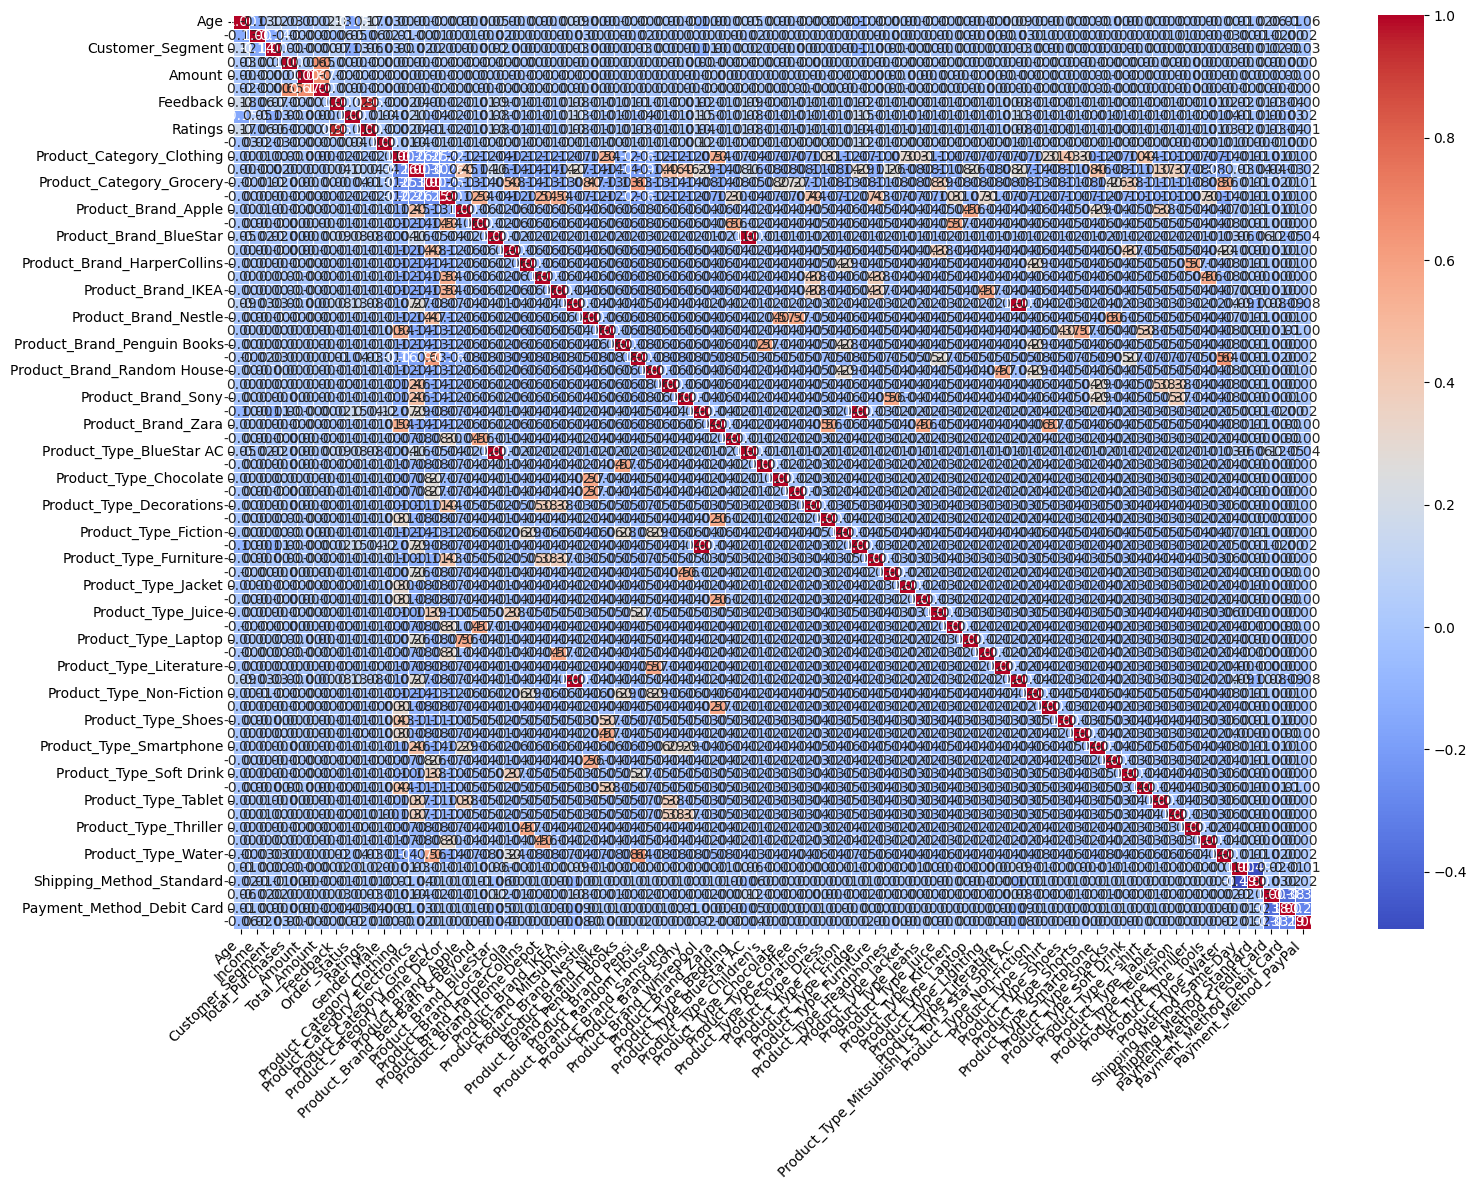

In [44]:
# 設定圖表大小
plt.figure(figsize=(16, 12))

# 繪製熱圖
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 旋轉 X 軸標籤，確保不重疊
plt.xticks(rotation=45, ha="right")

# 確保圖表不會被裁剪
plt.tight_layout()

# # 儲存圖片
# plt.savefig("heatmap_new.png", dpi=300)

# 顯示圖片
plt.show()